In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import json
import os

In [ ]:
DRIVE_PATH_METHYLATION = "/content/drive/MyDrive/Bioinformatics_dataset/Methylation"
PATH_METHYLATION = "/work/h2020deciderficarra_shared/TCGA/OV/project_n16_data/Methylation"
DRIVE_FILE_PATH_DICT= "/content/drive/MyDrive/Bioinformatics_dataset/case_id_and_structure.json"
FILE_PATH_DICT = "case_id_and_structure.json"

In [ ]:
# Load the file path dictionary
with open(DRIVE_FILE_PATH_DICT, 'r') as file: #FILE_PATH_DICT
    file_parsed = json.load(file)

# Create dictionaries for case_id and os
file_to_case_id = {file_parsed[k]['files']['methylation']: k for k in file_parsed.keys()}
file_to_os = {file_parsed[k]['files']['methylation']: file_parsed[k]['os'] for k in file_parsed.keys()}

In [ ]:
# Initialize the DataFrame
datastructure = pd.DataFrame(columns=['case_id', 'os', 'methylation'])

index = 0
for root, dirs, files in os.walk(DRIVE_PATH_METHYLATION):
    for dir in dirs:
        for root, dirs, files in os.walk(os.path.join(DRIVE_PATH_METHYLATION, dir)):
            for file in files:
                if file in file_to_case_id.keys():
                    parsed_file = pd.read_csv(os.path.join(DRIVE_PATH_METHYLATION, dir, file),
                                              sep='\t', header=None, names=["id", "methylation"])
                    parsed_file = parsed_file[['id', 'methylation']]
                    parsed_file = parsed_file.astype({'methylation': float, 'id': str})

                    # Extract methylation values
                    methylation_values = parsed_file['methylation'].tolist()

                    # Add the data to the DataFrame
                    datastructure.loc[index] = [
                        file_to_case_id[file],
                        file_to_os[file],
                        methylation_values
                    ]
                    index += 1

print(datastructure)

NameError: name 'float32' is not defined

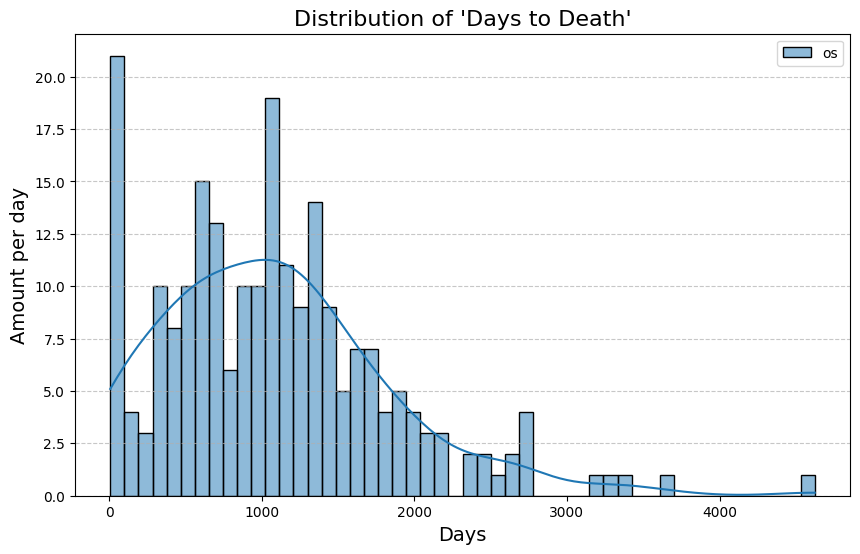

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(datastructure, bins=50, kde=True, color="red")
plt.title("Distribution of \'Days to Death\'", fontsize=16)
plt.xlabel("Days", fontsize=14)
plt.ylabel("Amount per day", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(datastructure.max())
print(datastructure.min())

case_id                     ff844242-7559-4b07-b09e-69ea40e5ac6b
os                                                          4624
methylation    [0.967625378662851, 0.0178045978099046, 0.3429...
dtype: object
case_id                     005a6517-2e5a-4ea3-ab36-531522723607
os                                                             8
methylation    [0.0340445148014076, 0.0133356221857615, 0.011...
dtype: object


In [ ]:
# Lista che conterrà le posizioni dei NaN per ogni file
list_of_NaN = {}
count = 0
count_record = 0

# Itera attraverso il DataFrame
for index, row in datastructure.iterrows():
    file = row['case_id']
    methylation_values = row['methylation']

    # Cerca "NA" nei valori di metilazione e salva la posizione
    nan_positions = []
    for i, value in enumerate(methylation_values):
        count_record += 1
        if pd.isna(value):  # Verifica se il valore è NaN
            nan_positions.append(i)
            count += 1

    # Aggiungi alla lista di liste
    list_of_NaN[file] = nan_positions

# Trasforma la lista in una serie di pandas per un'analisi più semplice
methylation = pd.Series(list_of_NaN)

# Stampa i risultati
print(type(list_of_NaN))
print(methylation)
print(len(list_of_NaN))
print(count)
print(count_record)
print(count / count_record)

<class 'dict'>
55153632-1673-487a-85c0-f156377db1fc    [9, 22, 46, 50, 54, 55, 58, 60, 69, 83, 88, 10...
2ab32e11-80d6-4ed0-a42e-da612219bbdd    [9, 22, 39, 46, 50, 54, 55, 58, 60, 69, 83, 88...
88d61634-913c-435a-8d25-e019c8dab7da    [9, 22, 39, 46, 54, 55, 58, 60, 69, 83, 88, 10...
34f545ab-d420-4dd2-8db4-3159896efd23    [9, 22, 35, 39, 46, 50, 54, 55, 58, 60, 69, 83...
65ddccd2-70a7-48b3-88e1-9d6fd1dcd11b    [9, 10, 22, 30, 39, 46, 54, 55, 58, 60, 69, 83...
                                                              ...                        
bc2591b0-65d7-48c3-a5cc-783f67b65869    [9, 22, 46, 54, 55, 58, 60, 69, 83, 88, 102, 1...
42b3dfa3-152f-4ab7-ac9f-988c7f473bea    [9, 22, 46, 50, 54, 55, 58, 60, 69, 83, 88, 10...
5d1a54fe-e0df-4c17-b623-b649a136dc82    [9, 22, 46, 54, 55, 58, 60, 69, 83, 88, 102, 1...
9446e349-71e6-455a-aa8f-53ec96597146    [9, 22, 33, 46, 50, 54, 55, 58, 60, 69, 83, 88...
32960bc7-839a-42c5-9460-3917fa578ffc    [9, 22, 30, 39, 46, 54, 55, 58, 60, 69, 83, 8

In [ ]:
for idx, file in enumerate(list_of_NaN):
    count_na = len(file)
    print(f"Riga {idx + 1}: {count_na} valori NA")

Riga 1: 36 valori NA
Riga 2: 36 valori NA
Riga 3: 36 valori NA
Riga 4: 36 valori NA
Riga 5: 36 valori NA
Riga 6: 36 valori NA
Riga 7: 36 valori NA
Riga 8: 36 valori NA
Riga 9: 36 valori NA
Riga 10: 36 valori NA
Riga 11: 36 valori NA
Riga 12: 36 valori NA
Riga 13: 36 valori NA
Riga 14: 36 valori NA
Riga 15: 36 valori NA
Riga 16: 36 valori NA
Riga 17: 36 valori NA
Riga 18: 36 valori NA
Riga 19: 36 valori NA
Riga 20: 36 valori NA
Riga 21: 36 valori NA
Riga 22: 36 valori NA
Riga 23: 36 valori NA
Riga 24: 36 valori NA
Riga 25: 36 valori NA
Riga 26: 36 valori NA
Riga 27: 36 valori NA
Riga 28: 36 valori NA
Riga 29: 36 valori NA
Riga 30: 36 valori NA
Riga 31: 36 valori NA
Riga 32: 36 valori NA
Riga 33: 36 valori NA
Riga 34: 36 valori NA
Riga 35: 36 valori NA
Riga 36: 36 valori NA
Riga 37: 36 valori NA
Riga 38: 36 valori NA
Riga 39: 36 valori NA
Riga 40: 36 valori NA
Riga 41: 36 valori NA
Riga 42: 36 valori NA
Riga 43: 36 valori NA
Riga 44: 36 valori NA
Riga 45: 36 valori NA
Riga 46: 36 valori 

In [ ]:
# Crea un nuovo DataFrame senza valori NaN nella colonna methylation
datastructure_without_na = datastructure.copy()

# Itera attraverso il DataFrame e rimuovi le righe con NaN nella colonna methylation
for index, row in datastructure.iterrows():
    methylation_values = row['methylation']
    # Crea un DataFrame temporaneo per i valori di metilazione
    temp_df = pd.DataFrame({'methylation': methylation_values})
    # Elimina le righe con valori NaN
    temp_df_without_na = temp_df.dropna()
    # Aggiorna la colonna methylation nel nuovo DataFrame
    datastructure_without_na.at[index, 'methylation'] = temp_df_without_na['methylation'].tolist()

print(datastructure_without_na)

                                  case_id    os  \
0    55153632-1673-487a-85c0-f156377db1fc  1102   
1    2ab32e11-80d6-4ed0-a42e-da612219bbdd  1699   
2    88d61634-913c-435a-8d25-e019c8dab7da   840   
3    34f545ab-d420-4dd2-8db4-3159896efd23  3224   
4    65ddccd2-70a7-48b3-88e1-9d6fd1dcd11b   204   
..                                    ...   ...   
221  bc2591b0-65d7-48c3-a5cc-783f67b65869  1583   
222  42b3dfa3-152f-4ab7-ac9f-988c7f473bea  3622   
223  5d1a54fe-e0df-4c17-b623-b649a136dc82  1688   
224  9446e349-71e6-455a-aa8f-53ec96597146   446   
225  32960bc7-839a-42c5-9460-3917fa578ffc   949   

                                           methylation  
0    [0.936655975250212, 0.521074693909812, 0.01937...  
1    [0.87140863052149, 0.036747557142073, 0.021550...  
2    [0.83707550415992, 0.14083591457622, 0.0163267...  
3    [0.914407916301801, 0.0937213778126057, 0.0824...  
4    [0.183027539715214, 0.029752110708971, 0.05830...  
..                                           

In [ ]:
# Crea un nuovo DataFrame con i valori NaN nella colonna methylation riempiti con 0
datastructure_0_filled = datastructure.copy()

# Itera attraverso il DataFrame e riempi i valori NaN nella colonna methylation con 0
for index, row in datastructure.iterrows():
    methylation_values = row['methylation']
    # Crea un DataFrame temporaneo per i valori di metilazione
    temp_df = pd.DataFrame({'methylation': methylation_values})
    # Riempi i valori NaN con 0
    temp_df_filled = temp_df.fillna(0)
    # Aggiorna la colonna methylation nel nuovo DataFrame
    datastructure_0_filled.at[index, 'methylation'] = temp_df_filled['methylation'].tolist()

print(datastructure_0_filled)

                                  case_id    os  \
0    55153632-1673-487a-85c0-f156377db1fc  1102   
1    2ab32e11-80d6-4ed0-a42e-da612219bbdd  1699   
2    88d61634-913c-435a-8d25-e019c8dab7da   840   
3    34f545ab-d420-4dd2-8db4-3159896efd23  3224   
4    65ddccd2-70a7-48b3-88e1-9d6fd1dcd11b   204   
..                                    ...   ...   
221  bc2591b0-65d7-48c3-a5cc-783f67b65869  1583   
222  42b3dfa3-152f-4ab7-ac9f-988c7f473bea  3622   
223  5d1a54fe-e0df-4c17-b623-b649a136dc82  1688   
224  9446e349-71e6-455a-aa8f-53ec96597146   446   
225  32960bc7-839a-42c5-9460-3917fa578ffc   949   

                                           methylation  
0    [0.936655975250212, 0.521074693909812, 0.01937...  
1    [0.87140863052149, 0.036747557142073, 0.021550...  
2    [0.83707550415992, 0.14083591457622, 0.0163267...  
3    [0.914407916301801, 0.0937213778126057, 0.0824...  
4    [0.183027539715214, 0.029752110708971, 0.05830...  
..                                           

In [ ]:
!pip install torch_geometric

In [ ]:
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
from matplotlib import pyplot as plt
import seaborn as sns
import torch
import os
import numpy as np
from sklearn.metrics import pairwise_distances
import time

Media della metilazione: 0.2282068279164594
Mediana della metilazione: 0.0339775544333965


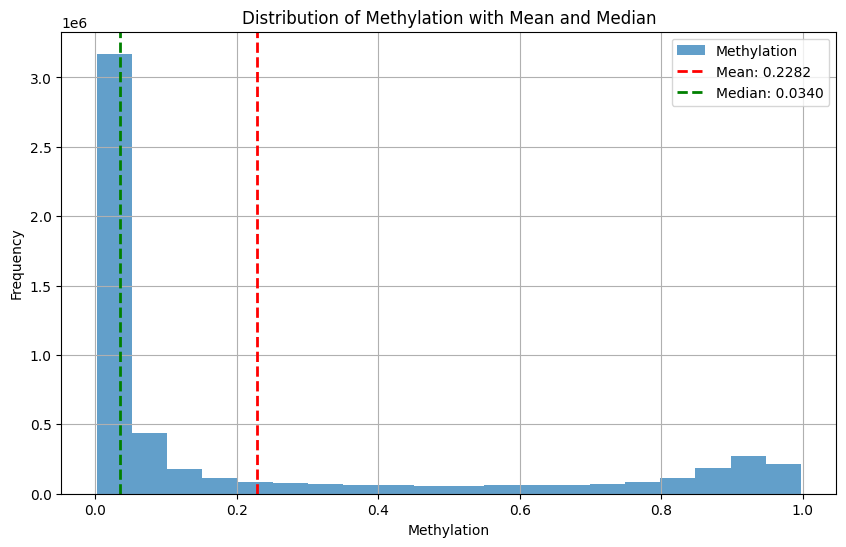

In [ ]:
# Creiamo una lista per contenere tutti i valori di metilazione
all_methylation_values = []

# Itera attraverso il DataFrame e aggiungi i valori di metilazione alla lista
for index, row in datastructure_without_na.iterrows():
    methylation_values = row['methylation']
    all_methylation_values.extend(methylation_values)

# Calcola la media e la mediana
mean_methylation_without_na = pd.Series(all_methylation_values).mean()
median_methylation_without_na = pd.Series(all_methylation_values).median()

print("Media della metilazione:", mean_methylation_without_na)
print("Mediana della metilazione:", median_methylation_without_na)

# Rappresenta la media e la mediana in un grafico
plt.figure(figsize=(10, 6))
plt.hist(all_methylation_values, bins=20, alpha=0.7, label='Methylation')
plt.axvline(mean_methylation_without_na, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_methylation_without_na:.4f}')
plt.axvline(median_methylation_without_na, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_methylation_without_na:.4f}')
plt.xlabel('Methylation')
plt.ylabel('Frequency')
plt.title('Distribution of Methylation with Mean and Median')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
THRESHOLD_WITHOUT_NA = median_methylation_without_na

list_of_Data_without_NaN = []
methylation_data = df_Met_without_na['methylation'].values
feature_size = methylation_data.shape[0]
edges = [[], []]

# Calcola la matrice delle distanze
dist_matrix = np.zeros((feature_size, feature_size))
for i in range(feature_size):
    for j in range(i + 1, feature_size):
        dist_matrix[i, j] = np.linalg.norm(methylation_data[i] - methylation_data[j])

# Trova gli indici dove la similarità è inferiore o uguale alla soglia
f_1_indices, f_2_indices = np.where(dist_matrix <= THRESHOLD_WITHOUT_NA)
for f_1_index, f_2_index in zip(f_1_indices, f_2_indices):
    if f_1_index < f_2_index:  # Assicurati di non duplicare gli indici
        edges[0].append(f_1_index)
        edges[0].append(f_2_index)
        edges[1].append(f_2_index)
        edges[1].append(f_1_index)

edge_index = torch.tensor(edges, dtype=torch.long)
x = torch.tensor(methylation_data, dtype=torch.float)

list_of_Data_without_NaN.append(Data(x=x, edge_index=edge_index))

MemoryError: Unable to allocate 221. TiB for an array with shape (5505602, 5505602) and data type float64

In [ ]:
# Definisci il valore della soglia
THRESHOLD_WITHOUT_NA = median_methylation_without_na

# Crea una nuova colonna 'methylation_flat' con i valori di metilazione appiattiti
datastructure_without_na['methylation_flat'] = datastructure_without_na['methylation'].apply(lambda x: np.array(x, dtype=np.float32))
list_of_Data_without_NaN = []
edges = []
start_time = time.time()

# Crea una lista di valori di metilazione appiattiti
in_1 = np.concatenate(datastructure_without_na['methylation_flat'].values).reshape(-1, 1)

print(f"In creation: {np.floor(time.time() - start_time)}s")
start_time = time.time()
dist_a = pairwise_distances(in_1[:100], in_1[:100], metric="euclidean")
print(f"Pairwise_distances: {np.floor(time.time() - start_time)}s")
start_time = time.time()

d_mask = np.zeros(dist_a.shape, dtype=bool)
np.fill_diagonal(d_mask, 1)

# Force the diagonal to be equal to Threshold, so it will not be considered, so no self loops.
dist_a[d_mask] = THRESHOLD_WITHOUT_NA

row, cols = np.where(dist_a < THRESHOLD_WITHOUT_NA)
edges.append(list(row))
edges.append(list(cols))

print(f"Edge creation: {np.floor(time.time() - start_time)}s")
start_time = time.time()

# Crea i tensori per x e y
x = torch.tensor(in_1, dtype=torch.float)
y = torch.tensor(datastructure_without_na['os'].values, dtype=torch.float)
edge_index = torch.tensor(edges, dtype=torch.long)

list_of_Data_without_NaN.append(Data(x=x, edge_index=edge_index, y=y))

print(f"Data creation: {np.floor(time.time() - start_time)}s")

# Verifica i contenuti di x e y
print("x:", x)
print("y:", y)
print("edge_index:", edge_index)

# Stampa ulteriori informazioni di debug
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
print("Shape of edge_index:", edge_index.shape)
print("First 10 values of x:", x[:10])
print("First 10 values of y:", y[:10])
print("First 10 edges:", edge_index[:, :10])

In creation: 0.0s
Pairwise_distances: 0.0s
Edge creation: 0.0s
Data creation: 0.0s
x: tensor([[0.9367],
        [0.5211],
        [0.0194],
        ...,
        [0.0331],
        [0.0789],
        [0.0270]])
y: tensor([1102., 1699.,  840., 3224.,  204.,  637.,  627., 1073.,  895.,  563.,
         528., 1004.,  361., 1082.,   31.,  681.,  883., 1875.,  351.,  506.,
         186., 1662., 1483., 1033., 1767., 1769.,  949.,   31.,  594., 1757.,
         951.,  679.,  608., 3260., 1249.,  871.,  396., 2467.,  676., 1162.,
          36., 1089., 1492., 1946., 1155., 1877., 1736.,  462.,  857.,  821.,
         629.,   74.,  354., 1018.,  479.,  690., 1442., 1000., 1579., 1278.,
          23.,   75.,  820.,  565., 1104., 1319., 1380., 2692.,  304.,  260.,
        1161.,   92., 1620., 2028.,  976., 4624.,  346.,  952.,  914.,  695.,
        1369.,  863.,  455., 1721., 1169.,   25., 1977.,  583., 2089.,  701.,
         518., 1091., 1199., 1499.,  138., 1484., 1158.,    9., 1213.,  730.,
        1

In [88]:
# Definisci il valore della soglia
THRESHOLD_WITHOUT_NA = median_methylation_without_na

# Calcola la media dei valori di metilazione per ogni campione
datastructure_without_na['methylation_mean'] = datastructure_without_na['methylation'].apply(lambda x: np.mean(x))

list_of_Data_without_NaN = []
edges = []
start_time = time.time()

# Crea una lista di valori di metilazione medi
in_1 = datastructure_without_na['methylation_mean'].values.reshape(-1, 1)

print(f"In creation: {np.floor(time.time() - start_time)}s")
start_time = time.time()
dist_a = pairwise_distances(in_1, in_1, metric="euclidean")
print(f"Pairwise_distances: {np.floor(time.time() - start_time)}s")
start_time = time.time()

d_mask = np.zeros(dist_a.shape, dtype=bool)
np.fill_diagonal(d_mask, 1)

# Force the diagonal to be equal to Threshold, so it will not be considered, so no self loops.
dist_a[d_mask] = THRESHOLD_WITHOUT_NA

row, cols = np.where(dist_a < THRESHOLD_WITHOUT_NA)
edges.append(list(row))
edges.append(list(cols))

print(f"Edge creation: {np.floor(time.time() - start_time)}s")
start_time = time.time()

# Crea i tensori per x e y
x = torch.tensor(in_1, dtype=torch.float)
y = torch.tensor(datastructure_without_na['os'].values, dtype=torch.float)
edge_index = torch.tensor(edges, dtype=torch.long)

list_of_Data_without_NaN.append(Data(x=x, edge_index=edge_index, y=y))

print(f"Data creation: {np.floor(time.time() - start_time)}s")

# Verifica i contenuti di x e y
print("x:", x)
print("y:", y)
print("edge_index:", edge_index)

# Stampa ulteriori informazioni di debug
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
print("Shape of edge_index:", edge_index.shape)
print("First 10 values of x:", x[:10])
print("First 10 values of y:", y[:10])
print("First 10 edges:", edge_index[:, :10])

In creation: 0.0s
Pairwise_distances: 0.0s
Edge creation: 0.0s
Data creation: 0.0s
x: tensor([[0.2612],
        [0.2168],
        [0.2397],
        [0.2269],
        [0.2324],
        [0.2311],
        [0.2332],
        [0.2351],
        [0.2454],
        [0.2439],
        [0.2457],
        [0.2368],
        [0.2262],
        [0.2063],
        [0.2515],
        [0.2258],
        [0.2191],
        [0.2843],
        [0.2230],
        [0.2434],
        [0.2175],
        [0.2551],
        [0.2166],
        [0.2054],
        [0.2411],
        [0.2214],
        [0.2480],
        [0.1982],
        [0.1811],
        [0.2395],
        [0.2220],
        [0.2343],
        [0.2548],
        [0.2358],
        [0.2406],
        [0.2167],
        [0.2310],
        [0.2250],
        [0.2647],
        [0.2396],
        [0.2304],
        [0.2221],
        [0.2598],
        [0.1825],
        [0.2128],
        [0.2531],
        [0.2691],
        [0.2310],
        [0.2387],
        [0.2630],
        [0.262

In [89]:
G1 = to_networkx(list_of_Data_without_NaN[0], to_undirected=True)

print("Numero di nodi:", G1.number_of_nodes())
print("Numero di archi:", G1.number_of_edges())

# Grado di ciascun nodo (numero di connessioni per gene)
degrees = dict(G1.degree())
print("Gradi dei nodi:", degrees)

# Nodo con il massimo grado (gene con più connessioni)
max_degree_node = max(degrees, key=degrees.get)
print(f"Gene con il massimo grado: {max_degree_node} ({degrees[max_degree_node]} connessioni)")

# Trova tutte le componenti connesse
connected_components = list(nx.connected_components(G1))
print("Numero di componenti connesse:", len(connected_components))

Numero di nodi: 226
Numero di archi: 25425
Gradi dei nodi: {0: 225, 1: 225, 2: 225, 3: 225, 4: 225, 5: 225, 6: 225, 7: 225, 8: 225, 9: 225, 10: 225, 11: 225, 12: 225, 13: 225, 14: 225, 15: 225, 16: 225, 17: 225, 18: 225, 19: 225, 20: 225, 21: 225, 22: 225, 23: 225, 24: 225, 25: 225, 26: 225, 27: 225, 28: 225, 29: 225, 30: 225, 31: 225, 32: 225, 33: 225, 34: 225, 35: 225, 36: 225, 37: 225, 38: 225, 39: 225, 40: 225, 41: 225, 42: 225, 43: 225, 44: 225, 45: 225, 46: 225, 47: 225, 48: 225, 49: 225, 50: 225, 51: 225, 52: 225, 53: 225, 54: 225, 55: 225, 56: 225, 57: 225, 58: 225, 59: 225, 60: 225, 61: 225, 62: 225, 63: 225, 64: 225, 65: 225, 66: 225, 67: 225, 68: 225, 69: 225, 70: 225, 71: 225, 72: 225, 73: 225, 74: 225, 75: 225, 76: 225, 77: 225, 78: 225, 79: 225, 80: 225, 81: 225, 82: 225, 83: 225, 84: 225, 85: 225, 86: 225, 87: 225, 88: 225, 89: 225, 90: 225, 91: 225, 92: 225, 93: 225, 94: 225, 95: 225, 96: 225, 97: 225, 98: 225, 99: 225, 100: 225, 101: 225, 102: 225, 103: 225, 104: 225, 

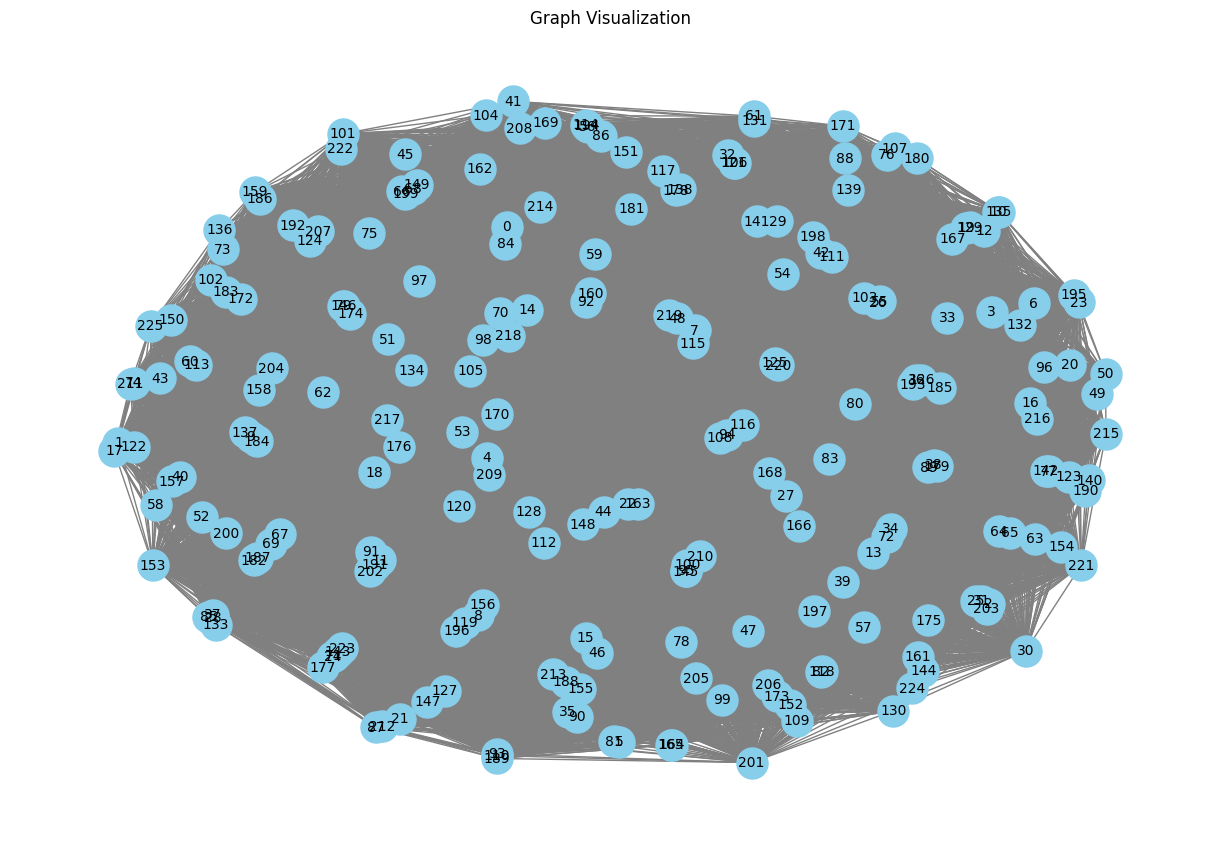

In [90]:
# Convert the PyG data object to a NetworkX graph
G1 = to_networkx(list_of_Data_without_NaN[0], to_undirected=True)

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G1)  # Layout for the nodes
nx.draw(G1, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Graph Visualization")
plt.show()

Media della metilazione: 0.20158686964640232
Mediana della metilazione: 0.02613020219893905


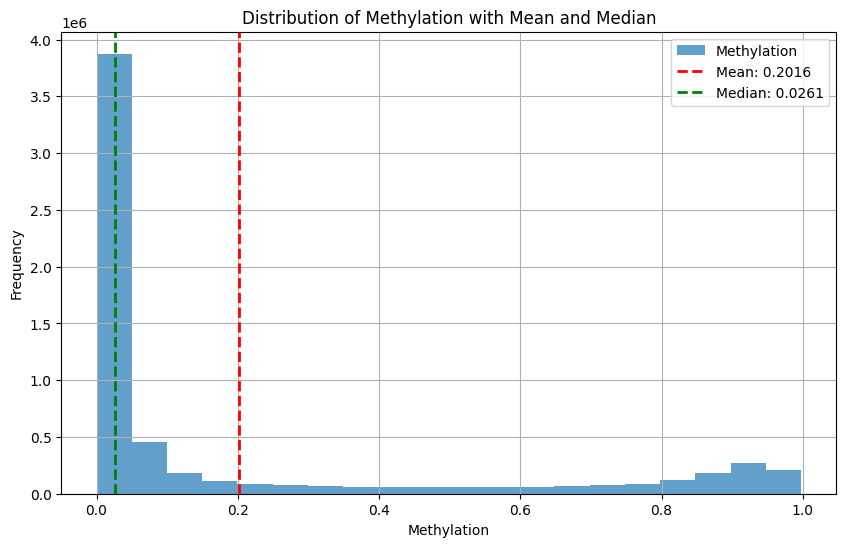

In [ ]:
# Creiamo una lista per contenere tutti i valori di metilazione
all_methylation_values = []

# Itera attraverso il DataFrame e aggiungi i valori di metilazione alla lista
for index, row in datastructure_0_filled.iterrows():
    methylation_values = row['methylation']
    all_methylation_values.extend(methylation_values)

# Calcola la media e la mediana
mean_methylation_0_filled = pd.Series(all_methylation_values).mean()
median_methylation_0_filled = pd.Series(all_methylation_values).median()

print("Media della metilazione:", mean_methylation_0_filled)
print("Mediana della metilazione:", median_methylation_0_filled)

# Rappresenta la media e la mediana in un grafico
plt.figure(figsize=(10, 6))
plt.hist(all_methylation_values, bins=20, alpha=0.7, label='Methylation')
plt.axvline(mean_methylation_0_filled, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_methylation_0_filled:.4f}')
plt.axvline(median_methylation_0_filled, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_methylation_0_filled:.4f}')
plt.xlabel('Methylation')
plt.ylabel('Frequency')
plt.title('Distribution of Methylation with Mean and Median')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Definisci il valore della soglia
THRESHOLD_0_FILLED = median_methylation_0_filled

# Crea una nuova colonna 'methylation_flat' con i valori di metilazione appiattiti
datastructure_without_na['methylation_flat'] = datastructure_0_filled['methylation'].apply(lambda x: np.array(x, dtype=np.float32))
list_of_Data_0_filled = []
edges = []
start_time = time.time()

# Crea una lista di valori di metilazione appiattiti
in_1 = np.concatenate(datastructure_0_filled['methylation_flat'].values).reshape(-1, 1)

print(f"In creation: {np.floor(time.time() - start_time)}s")
start_time = time.time()
dist_a = pairwise_distances(in_1[:100], in_1[:100], metric="euclidean")
print(f"Pairwise_distances: {np.floor(time.time() - start_time)}s")
start_time = time.time()

d_mask = np.zeros(dist_a.shape, dtype=bool)
np.fill_diagonal(d_mask, 1)

# Force the diagonal to be equal to Threshold, so it will not be considered, so no self loops.
dist_a[d_mask] = THRESHOLD_0_FILLED

row, cols = np.where(dist_a < THRESHOLD_0_FILLED)
edges.append(list(row))
edges.append(list(cols))

print(f"Edge creation: {np.floor(time.time() - start_time)}s")
start_time = time.time()

# Crea i tensori per x e y
x = torch.tensor(in_1, dtype=torch.float)
y = torch.tensor(datastructure_0_filled['os'].values, dtype=torch.float)
edge_index = torch.tensor(edges, dtype=torch.long)

list_of_Data_0_filled.append(Data(x=x, edge_index=edge_index, y=y))

print(f"Data creation: {np.floor(time.time() - start_time)}s")

# Verifica i contenuti di x e y
print("x:", x)
print("y:", y)
print("edge_index:", edge_index)

# Stampa ulteriori informazioni di debug
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
print("Shape of edge_index:", edge_index.shape)
print("First 10 values of x:", x[:10])
print("First 10 values of y:", y[:10])
print("First 10 edges:", edge_index[:, :10])

In [92]:
# Definisci il valore della soglia
THRESHOLD_0_FILLED = median_methylation_0_filled

# Calcola la media dei valori di metilazione per ogni campione
datastructure_0_filled['methylation_mean'] = datastructure_0_filled['methylation'].apply(lambda x: np.mean(x))

list_of_Data_0_filled = []
edges = []
start_time = time.time()

# Crea una lista di valori di metilazione medi
in_1 = datastructure_0_filled['methylation_mean'].values.reshape(-1, 1)

print(f"In creation: {np.floor(time.time() - start_time)}s")
start_time = time.time()
dist_a = pairwise_distances(in_1, in_1, metric="euclidean")
print(f"Pairwise_distances: {np.floor(time.time() - start_time)}s")
start_time = time.time()

d_mask = np.zeros(dist_a.shape, dtype=bool)
np.fill_diagonal(d_mask, 1)

# Force the diagonal to be equal to Threshold, so it will not be considered, so no self loops.
dist_a[d_mask] = THRESHOLD_0_FILLED

row, cols = np.where(dist_a < THRESHOLD_0_FILLED)
edges.append(list(row))
edges.append(list(cols))

print(f"Edge creation: {np.floor(time.time() - start_time)}s")
start_time = time.time()

# Crea i tensori per x e y
x = torch.tensor(in_1, dtype=torch.float)
y = torch.tensor(datastructure_0_filled['os'].values, dtype=torch.float)
edge_index = torch.tensor(edges, dtype=torch.long)

list_of_Data_0_filled.append(Data(x=x, edge_index=edge_index, y=y))

print(f"Data creation: {np.floor(time.time() - start_time)}s")

# Verifica i contenuti di x e y
print("x:", x)
print("y:", y)
print("edge_index:", edge_index)

# Stampa ulteriori informazioni di debug
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
print("Shape of edge_index:", edge_index.shape)
print("First 10 values of x:", x[:10])
print("First 10 values of y:", y[:10])
print("First 10 edges:", edge_index[:, :10])

In creation: 0.0s
Pairwise_distances: 0.0s
Edge creation: 0.0s
Data creation: 0.0s
x: tensor([[0.2345],
        [0.1935],
        [0.2109],
        [0.1958],
        [0.2049],
        [0.2084],
        [0.2073],
        [0.2017],
        [0.1990],
        [0.2188],
        [0.2065],
        [0.2093],
        [0.1972],
        [0.1814],
        [0.2251],
        [0.1940],
        [0.1938],
        [0.2577],
        [0.1888],
        [0.2213],
        [0.1959],
        [0.2226],
        [0.1922],
        [0.1747],
        [0.2160],
        [0.2010],
        [0.2210],
        [0.1752],
        [0.1627],
        [0.2108],
        [0.1947],
        [0.2055],
        [0.2259],
        [0.2095],
        [0.2142],
        [0.1908],
        [0.2059],
        [0.2024],
        [0.2386],
        [0.2141],
        [0.2085],
        [0.1956],
        [0.2324],
        [0.1567],
        [0.1823],
        [0.2229],
        [0.2417],
        [0.2010],
        [0.2155],
        [0.2350],
        [0.233

In [93]:
G2 = to_networkx(list_of_Data_0_filled[0], to_undirected=True)

print("Numero di nodi:", G2.number_of_nodes())
print("Numero di archi:", G2.number_of_edges())

# Grado di ciascun nodo (numero di connessioni per gene)
degrees = dict(G2.degree())
print("Gradi dei nodi:", degrees)

# Nodo con il massimo grado (gene con più connessioni)
max_degree_node = max(degrees, key=degrees.get)
print(f"Gene con il massimo grado: {max_degree_node} ({degrees[max_degree_node]} connessioni)")

# Trova tutte le componenti connesse
connected_components = list(nx.connected_components(G2))
print("Numero di componenti connesse:", len(connected_components))

Numero di nodi: 226
Numero di archi: 16575
Gradi dei nodi: {0: 80, 1: 170, 2: 177, 3: 173, 4: 182, 5: 183, 6: 183, 7: 184, 8: 182, 9: 160, 10: 183, 11: 181, 12: 179, 13: 135, 14: 126, 15: 169, 16: 169, 17: 14, 18: 155, 19: 144, 20: 173, 21: 137, 22: 168, 23: 102, 24: 172, 25: 184, 26: 145, 27: 107, 28: 48, 29: 177, 30: 170, 31: 183, 32: 122, 33: 180, 34: 174, 35: 166, 36: 183, 37: 184, 38: 63, 39: 176, 40: 183, 41: 172, 42: 91, 43: 32, 44: 140, 45: 135, 46: 53, 47: 184, 48: 170, 49: 78, 50: 82, 51: 184, 52: 168, 53: 152, 54: 178, 55: 168, 56: 168, 57: 110, 58: 182, 59: 184, 60: 168, 61: 144, 62: 119, 63: 171, 64: 47, 65: 36, 66: 155, 67: 132, 68: 177, 69: 181, 70: 170, 71: 184, 72: 108, 73: 66, 74: 142, 75: 168, 76: 168, 77: 183, 78: 105, 79: 177, 80: 181, 81: 168, 82: 166, 83: 118, 84: 178, 85: 171, 86: 93, 87: 28, 88: 112, 89: 171, 90: 181, 91: 159, 92: 156, 93: 184, 94: 67, 95: 182, 96: 117, 97: 182, 98: 172, 99: 145, 100: 176, 101: 169, 102: 184, 103: 166, 104: 123, 105: 176, 106: 

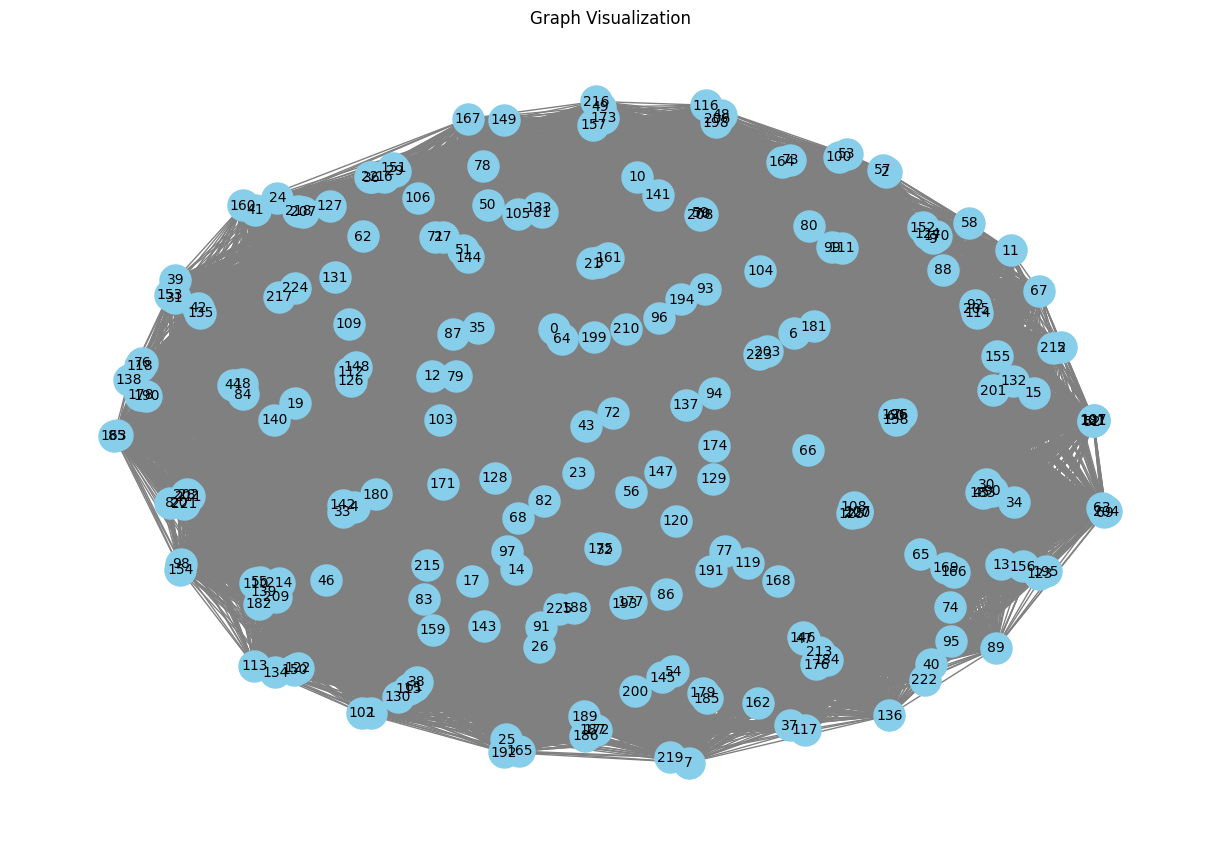

In [94]:
# Convert the PyG data object to a NetworkX graph
G2 = to_networkx(list_of_Data_0_filled[0], to_undirected=True)

# Visualize the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G1)  # Layout for the nodes
nx.draw(G1, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Graph Visualization")
plt.show()